# Introduction to the notion of digital text corpus

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

In [2]:
import json
from datetime import datetime

In [3]:
with open('data/twitter-news.json', 'r') as infile:
    dataset = json.load(infile)

In [4]:
raw_corpus, corpus = [], []
for k, v in dataset.items():
    raw_corpus.append(v['text'])
    m = {}
    m['created_at'] = datetime.strftime(
        datetime.strptime(v['created_at'],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
    for z in ['favorite_count', 'hashtags', 'id', 'retweet_count', 'lang', 'text']:
        try:
            m[z] = v[z]
        except KeyError:
            m[z] = None
    m['screen'] = v['user']['screen_name']
    corpus.append(m)

In [5]:
for text in raw_corpus[:2]:
    print(text)

🇺🇸🇨🇳 Il supercomputer giapponese Fugaku ha toccato un picco di velocità pari a 415,5 petaflops, milioni di miliardi… https://t.co/mgqmtteL8K
🇺🇸🇨🇳 Nel Mar cinese meridionale e intorno a Taiwan i pattugliamenti delle marine americana e cinese e delle due aer… https://t.co/rxRjqmfTaH


In [6]:
sample = raw_corpus[:6]

In [10]:
print(sample[4])

«Giocava come Giggs, suonava come Bob Dylan»: l’incredibile (e triste) storia di Adrian... https://t.co/133HEMDkqL https://t.co/KYGNG3GDrV


In [8]:
print(sample[4].split())

['«Giocava', 'come', 'Giggs,', 'suonava', 'come', 'Bob', 'Dylan»:', 'l’incredibile', '(e', 'triste)', 'storia', 'di', 'Adrian...', 'https://t.co/133HEMDkqL', 'https://t.co/KYGNG3GDrV']


In [11]:
from nltk.tokenize import TweetTokenizer

In [13]:
tkz = TweetTokenizer()
print(tkz.tokenize(sample[4]))

['«', 'Giocava', 'come', 'Giggs', ',', 'suonava', 'come', 'Bob', 'Dylan', '»', ':', 'l', '’', 'incredibile', '(', 'e', 'triste', ')', 'storia', 'di', 'Adrian', '...', 'https://t.co/133HEMDkqL', 'https://t.co/KYGNG3GDrV']


In [14]:
import spacy

In [15]:
nlp = spacy.load("it_core_news_sm")

In [18]:
words = []
attributes = ['text', 'lemma_', 'pos_', 'dep_', 
              'shape_', 'is_alpha', 'is_stop']
for token in nlp(sample[4]):
    data = {}
    for a in attributes:
        data[a] = getattr(token, a)
    words.append(data)
S = pd.DataFrame(words)

In [24]:
print(S.head(10).to_markdown())

|    | text    | lemma_   | pos_   | dep_      | shape_   | is_alpha   | is_stop   |
|---:|:--------|:---------|:-------|:----------|:---------|:-----------|:----------|
|  0 | «       | «        | PUNCT  | punct     | «        | False      | False     |
|  1 | Giocava | Giocava  | VERB   | ROOT      | Xxxxx    | True       | False     |
|  2 | come    | come     | ADP    | case      | xxxx     | True       | True      |
|  3 | Giggs   | Giggs    | PROPN  | obl       | Xxxxx    | True       | False     |
|  4 | ,       | ,        | PUNCT  | punct     | ,        | False      | False     |
|  5 | suonava | suonare  | VERB   | parataxis | xxxx     | True       | False     |
|  6 | come    | come     | ADP    | case      | xxxx     | True       | True      |
|  7 | Bob     | Bob      | PROPN  | obl       | Xxx      | True       | False     |
|  8 | Dylan   | Dylan    | PROPN  | flat:name | Xxxxx    | True       | False     |
|  9 | »       | »        | PUNCT  | punct     | »        | False

In [31]:
words = []
attributes = ['text', 'lemma_', 'pos_', 'dep_', 
              'shape_', 'is_alpha', 'is_stop']
for token in nlp(sample[4].lower()):
    data = {}
    if token.pos_ not in ['PUNCT', 'DET'] and not token.text.startswith('http'):
        for a in attributes:
            data[a] = getattr(token, a)
        words.append(data)
S = pd.DataFrame(words)

In [32]:
print(S.text.values)

['giocava' 'come' 'giggs' 'suonava' 'come' 'bob' 'dylan' 'incredibile' 'e'
 'triste' 'storia' 'di' 'adrian']


In [33]:
print(S.lemma_.values)

['giocare' 'come' 'giggs' 'suonare' 'come' 'bob' 'dylan' 'incredibile' 'e'
 'tristo' 'storia' 'di' 'adrian']


## Indexing

In [140]:
from collections import defaultdict

In [175]:
tf = True

In [176]:
I = defaultdict(lambda: defaultdict(lambda: 0))
for i, text in enumerate(raw_corpus):
    for token in nlp(text.lower()):
        if token.pos_ not in ['PUNCT', 'DET'] and not token.text.startswith('http'):
            if tf:
                I[i][token.lemma_] += 1
            else:
                I[i][token.lemma_] = 1
If = pd.DataFrame(I)
If.fillna(0, inplace=True)

In [177]:
If.head()

,0,1,2,3,4,5,6,7,8,9,...,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343
🇺,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
🇸,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
🇨,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
🇳,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
supercomputer,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
words = ['milano', 'covid', 'come', 'cina', 'sanità']
If.loc[words][[4, 24, 25, 32, 294, 31, 32, 40, 773]]

,4,24,25,32,294,31,32,40,773
milano,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
covid,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
come,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
cina,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
sanità,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
generic_words = [x for x, y in sorted(If.sum(axis=1).items(), key=lambda x: -x[1]) if len(x) > 1][:9]
words = ['milano', 'covid', 'come', 'cina', 'sanità', 'emergenza', 'ospedale', 'isolamento']
example = If.loc[generic_words + words][[4, 24, 25, 32, 294, 31, 36, 40, 773]]

In [180]:
example

,4,24,25,32,294,31,36,40,773
di,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0
in,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
essere,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
per,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
su,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
rt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
con,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
della,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
avere,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
milano,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
tfn = If[[4, 24, 25, 32, 294, 31, 36, 40, 773]].max(axis=0)

In [203]:
tfnorm = 0.5 + 0.5 * example / tfn

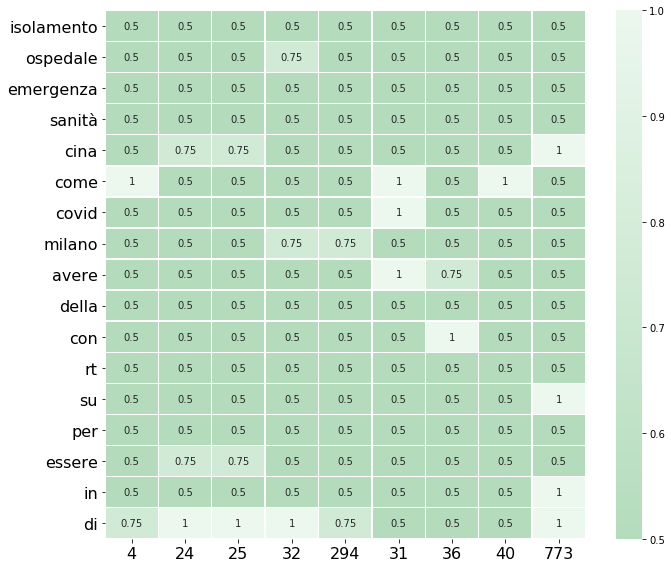

In [204]:
fig, ax = plt.subplots(figsize=(10, 8))
p = sns.cubehelix_palette(8, start=2, rot=0, dark=.80, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(tfnorm, linewidths=.5, annot=True, cmap=p)
ax.set_ylim([0,len(words) + len(generic_words)])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=16, rotation=0)
plt.tight_layout()
plt.savefig('/Users/alfio/Teaching/2019-20/masterdh/imgs/heatcovidtf.pdf')
plt.show()

In [109]:
for d in [4, 24, 25, 32, 294, 31, 36, 40, 773]:
    print('**doc {}**:'.format(d), " ".join([x for x in raw_corpus[d].split() if not x.startswith('http')]))

**doc 4**: «Giocava come Giggs, suonava come Bob Dylan»: l’incredibile (e triste) storia di Adrian...
**doc 24**: Cina-Usa, il rischio di uno scontro militare è il «più alto di sempre»
**doc 25**: Cina-Usa, il rischio di uno scontro militare è il «più alto di sempre»
**doc 32**: Roberto Fumagalli, direttore del Dipartimento di Anestesia e Rianimazione dell’Ospedale Niguarda di Milano, dice: «…
**doc 294**: Guasto alla linea alle porte di Milano, bloccato Frecciarossa Torino-Napoli
**doc 31**: Nel nuovo @DataroomCorsera @M_gabanelli e @SimonaRavizza spiegano come il Covid abbia allungato le liste d’attesa p…
**doc 36**: La prof e lo studente con la pistola all’esame: «L’ho disarmato parlandogli con calma»
**doc 40**: Vuoi vendere la tua vecchia bici online? Ecco come fare (e quale sito scegliere): la guida
**doc 773**: Oggi su Rep: 👇 Patten, l'ultimo governatore: "In Cina metodi criminali" [di SEBASTIEN FALLETTI]


In [198]:
idf = pd.DataFrame(np.log((If.shape[0] / If.sum(axis=1)))).loc[tfnorm.index]

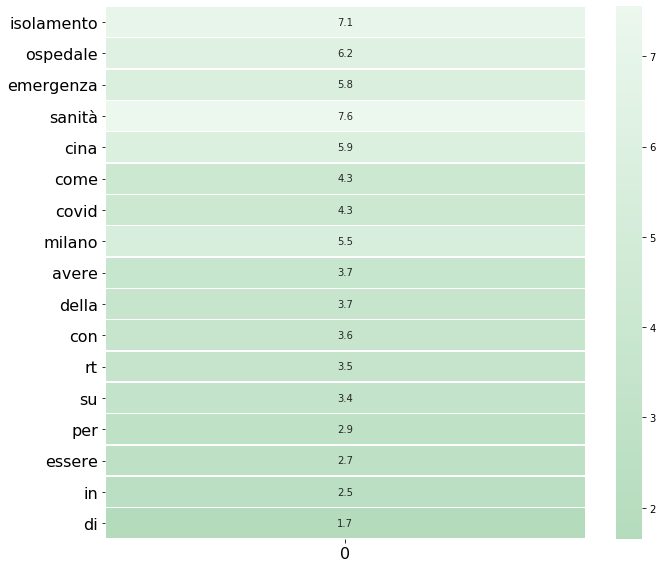

In [199]:
fig, ax = plt.subplots(figsize=(10, 8))
p = sns.cubehelix_palette(8, start=2, rot=0, dark=.80, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(idf, linewidths=.5, annot=True, cmap=p)
ax.set_ylim([0,len(words) + len(generic_words)])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=16, rotation=0)
plt.tight_layout()
plt.savefig('/Users/alfio/Teaching/2019-20/masterdh/imgs/heatcovididf.pdf')
plt.show()

In [205]:
tfidf = tfnorm.copy()
for k, v in idf[0].items():
    for c, w in round(tfnorm.loc[k] * v, 2).items():
        tfidf.loc[k][c] = w

In [206]:
tfidf

,4,24,25,32,294,31,36,40,773
di,1.24,1.66,1.66,1.66,1.24,0.83,0.83,0.83,1.66
in,1.23,1.23,1.23,1.23,1.23,1.23,1.23,1.23,2.46
essere,1.36,2.05,2.05,1.36,1.36,1.36,1.36,1.36,1.36
per,1.45,1.45,1.45,1.45,1.45,1.45,1.45,1.45,1.45
su,1.68,1.68,1.68,1.68,1.68,1.68,1.68,1.68,3.37
rt,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75
con,1.79,1.79,1.79,1.79,1.79,1.79,3.58,1.79,1.79
della,1.84,1.84,1.84,1.84,1.84,1.84,1.84,1.84,1.84
avere,1.85,1.85,1.85,1.85,1.85,3.69,2.77,1.85,1.85
milano,2.74,2.74,2.74,4.10,4.10,2.74,2.74,2.74,2.74


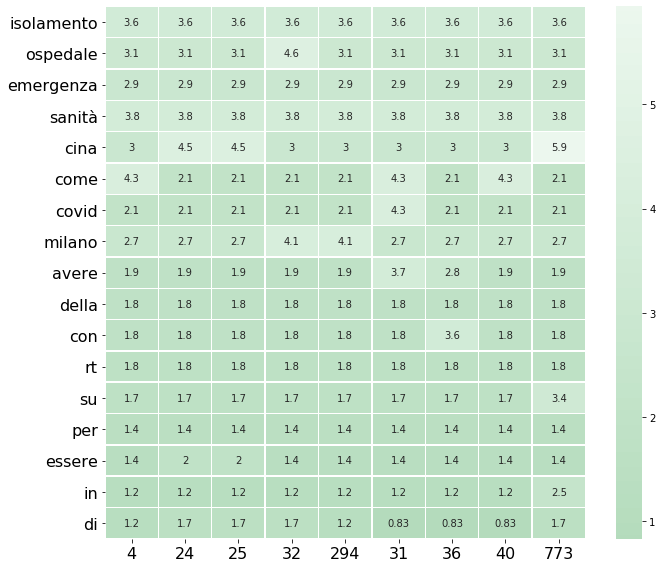

In [207]:
fig, ax = plt.subplots(figsize=(10, 8))
p = sns.cubehelix_palette(8, start=2, rot=0, dark=.80, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(tfidf, linewidths=.5, annot=True, cmap=p)
ax.set_ylim([0,len(words) + len(generic_words)])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=16, rotation=0)
plt.tight_layout()
plt.savefig('/Users/alfio/Teaching/2019-20/masterdh/imgs/heatcovidtfidf.pdf')
plt.show()